# White Box - Supervised ML Project
__Name:__ Yaqeen Mansoor Alsari

__Topic Name:__ Video games sales
 

## Introduction
Brief overview of the business challenge and dataset

### Problem Statement
Finding which video games will be successful in the global market to optimize their development and marketing investments


### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…



In [1998]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Import DummyClassifier to calculate the baseline (null) model
from sklearn.dummy import DummyClassifier

# Import logistic regression
from sklearn.linear_model import LogisticRegression



In [1999]:
data=pd.read_csv('D:/GA-25/project3- machine learning/vgsales.csv')


In [2000]:
data.shape

(16598, 11)

In [2001]:
data.shape[0]

16598

In [2002]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [2003]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [2004]:
data.duplicated().sum()

0

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [2005]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [2006]:
print(data.isna().sum())

data.shape[0]

#dropping the null cols 
data_new=data
data_new=data_new.dropna()

data_new.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

<Axes: xlabel='Global_Sales', ylabel='Count'>

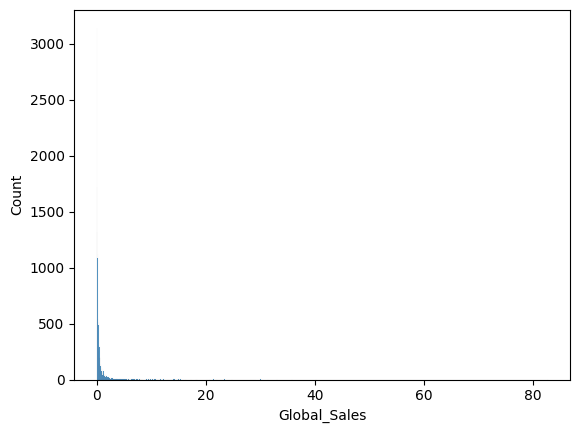

In [2007]:
sns.histplot(data=data, x='Global_Sales')

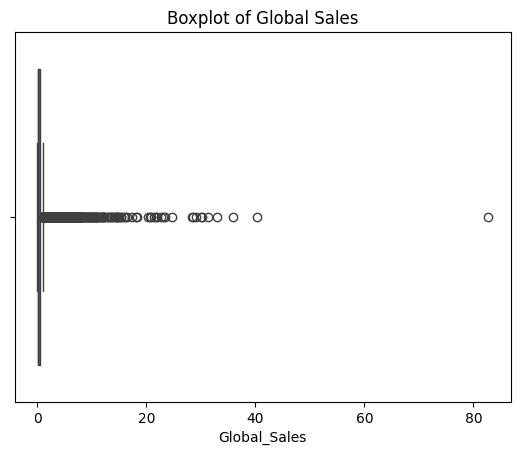

In [2008]:
#checking for outliers in the Global Sales col:

sns.boxplot(x=data['Global_Sales'])
plt.title("Boxplot of Global Sales")
plt.show()



C:\Users\yaqee\AppData\Local\Temp\ipykernel_2824\2888597839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['log_Global_Sales'] = np.log1p(data_new['Global_Sales'])


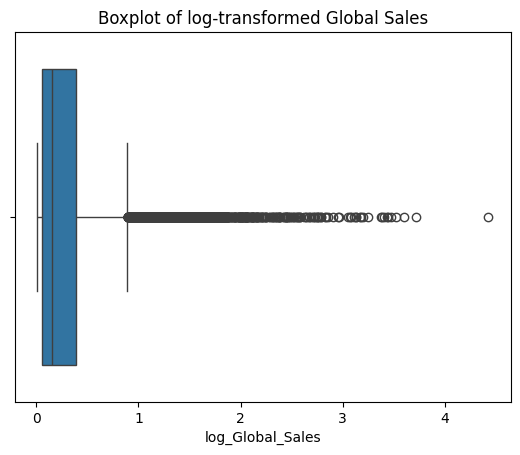

In [2009]:
data_new['log_Global_Sales'] = np.log1p(data_new['Global_Sales'])
#sns.boxplot(x=np.log1p(data['Global_Sales']))
sns.boxplot(x=data_new['log_Global_Sales'])
plt.title("Boxplot of log-transformed Global Sales")
plt.show()

In [2010]:
"""Q1 = data_new['log_Global_Sales'].quantile(0.25)
Q3 = data_new['log_Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_new= data_new[(data_new['log_Global_Sales'] >= lower_bound) & (data_new['log_Global_Sales'] <= upper_bound)]
"""


#removing this only data point alone:
data_new = data_new[data_new['Global_Sales'] < data_new['Global_Sales'].max()]
data_new = data_new[data_new['log_Global_Sales'] < data_new['log_Global_Sales'].max()]

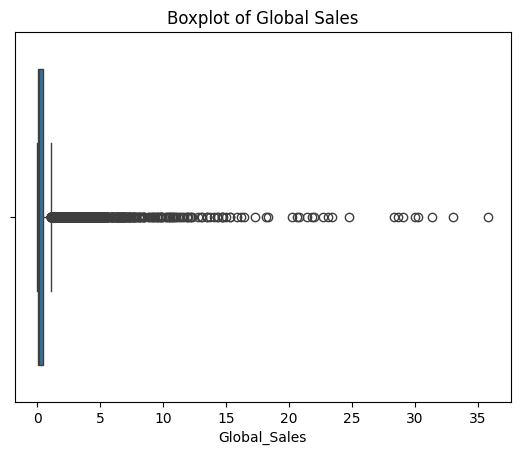

In [2011]:
#checking: 
sns.boxplot(x=data_new['Global_Sales'])
plt.title("Boxplot of Global Sales")
plt.show()

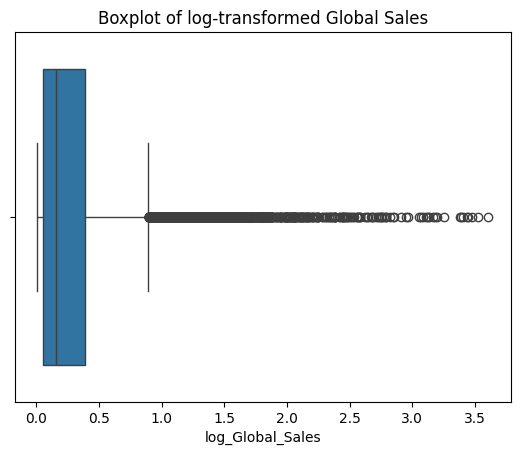

In [2012]:
data_new['log_Global_Sales'] = np.log1p(data_new['Global_Sales'])
#sns.boxplot(x=np.log1p(data['Global_Sales']))
sns.boxplot(x=data_new['log_Global_Sales'])
plt.title("Boxplot of log-transformed Global Sales")
plt.show()

In [2013]:
data.shape[0]

16598

<Axes: xlabel='log_Global_Sales', ylabel='Count'>

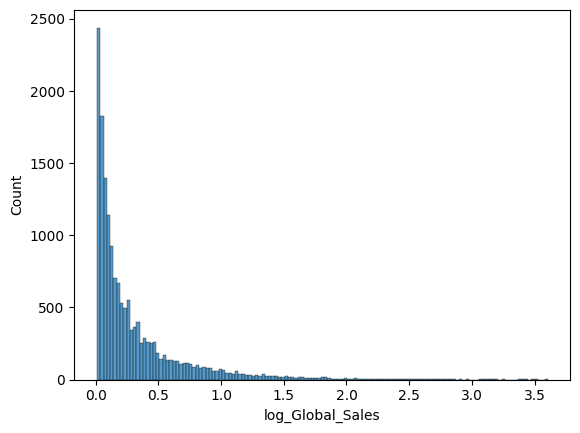

In [2014]:
sns.histplot(data=data_new, x='log_Global_Sales')

In [2015]:
#keeping only the publishers that occured more than 100 times in the data set

"""publishers_to_keep = data_new['Publisher'].value_counts()[data['Publisher'].value_counts() > 100].index

data_new = data_new[data_new['Publisher'].isin(publishers_to_keep)]

data_new['Publisher'].value_counts()
"""


#another more effective way (maybe)?
#dropping the rare in the publishers and the platforms

rare_publishers = data_new['Publisher'].value_counts()[data_new['Publisher'].value_counts() < 20].index
rare_platforms = data_new['Platform'].value_counts()[data_new['Platform'].value_counts() < 20].index

data_new = data_new[~data_new['Publisher'].isin(rare_publishers)]
data_new = data_new[~data_new['Platform'].isin(rare_platforms)]

In [2016]:
data.shape[0]

16598

In [2017]:
data_new.shape[0]

14212

## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


In [2018]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<Axes: xlabel='Year', ylabel='Global_Sales'>

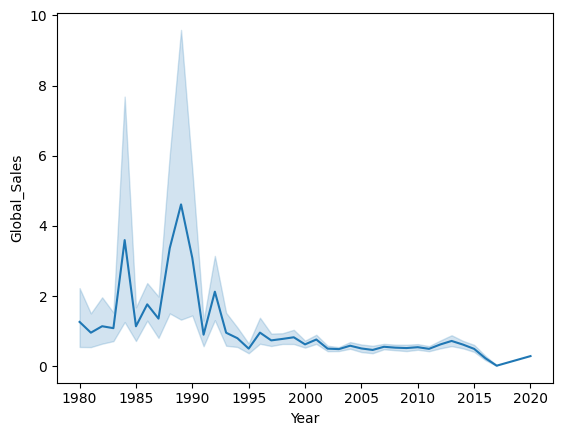

In [2019]:
#checking for relationships:
sns.lineplot(data=data_new, x='Year', y='Global_Sales')


<Axes: xlabel='Year', ylabel='log_Global_Sales'>

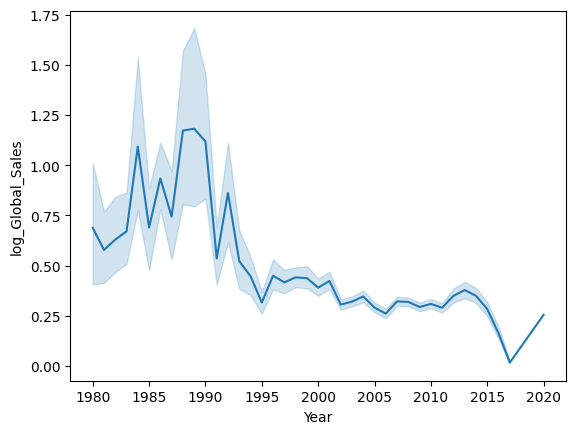

In [2020]:
sns.lineplot(data=data_new, x='Year', y='log_Global_Sales')


In [2021]:
#the sales have been higher in the past years, and its showing a decreasing trend, tho the sales has gone up in 2020, this is probably due to  lockdown and covid-19 

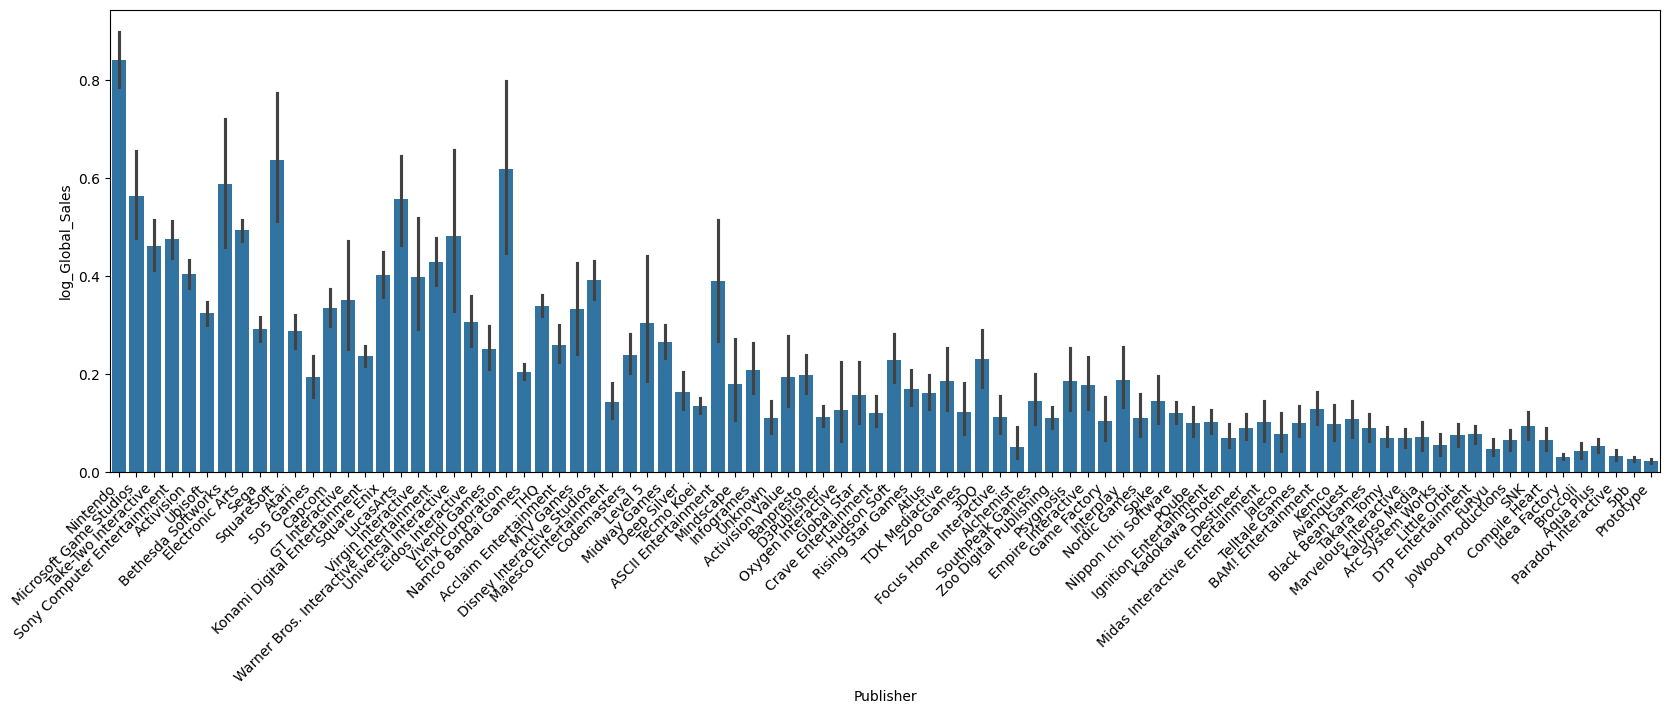

In [2022]:
#checking for association between the Global Sales and the publisher :

plt.figure(figsize=(20, 6))
sns.barplot(data=data_new, x='Publisher', y='log_Global_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [2023]:
# there is association 

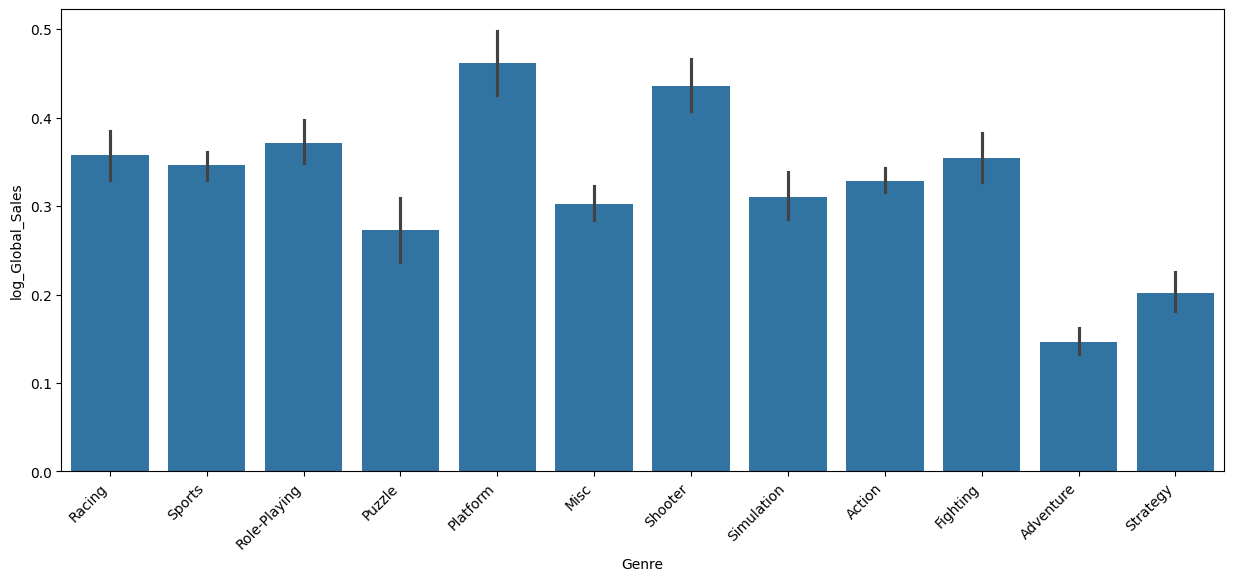

In [2024]:
#checking for association betweet Global Sales and genre
plt.figure(figsize=(15, 6))
sns.barplot(data=data_new, x='Genre', y='log_Global_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [2025]:
#sports , fighting, shooter and platform genres has the most sales, and the rest follow behined, the Adventure genre has the least sales. 

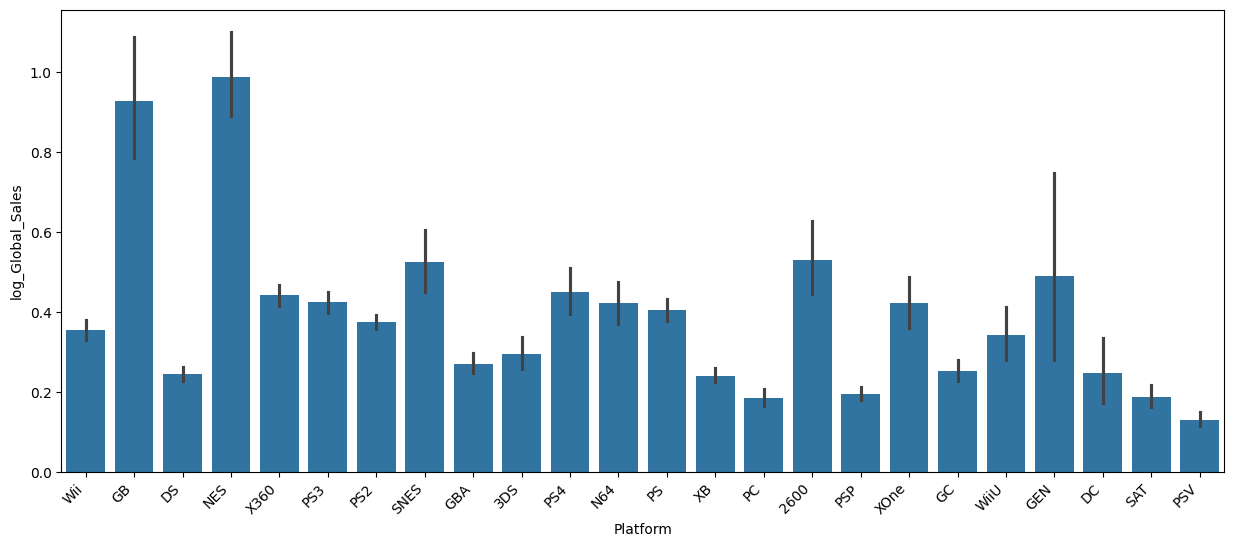

In [2026]:
#checking for association between the Global Sales and the platform :
plt.figure(figsize=(15, 6))
sns.barplot(data=data_new, x='Platform', y='log_Global_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [2027]:
#NES clearly has the most sales, the 2600 is behined it,, GG has the least saling platform

([<matplotlib.axis.XTick at 0x16f2d857d90>,
 [Text(1980, 0, '1980'),
  Text(1982, 0, '1982'),
  Text(1984, 0, '1984'),
  Text(1986, 0, '1986'),
  Text(1988, 0, '1988'),
  Text(1990, 0, '1990'),
  Text(1992, 0, '1992'),
  Text(1994, 0, '1994'),
  Text(1996, 0, '1996'),
  Text(1998, 0, '1998'),
  Text(2000, 0, '2000'),
  Text(2002, 0, '2002'),
  Text(2004, 0, '2004'),
  Text(2006, 0, '2006'),
  Text(2008, 0, '2008'),
  Text(2010, 0, '2010'),
  Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018'),
  Text(2020, 0, '2020')])

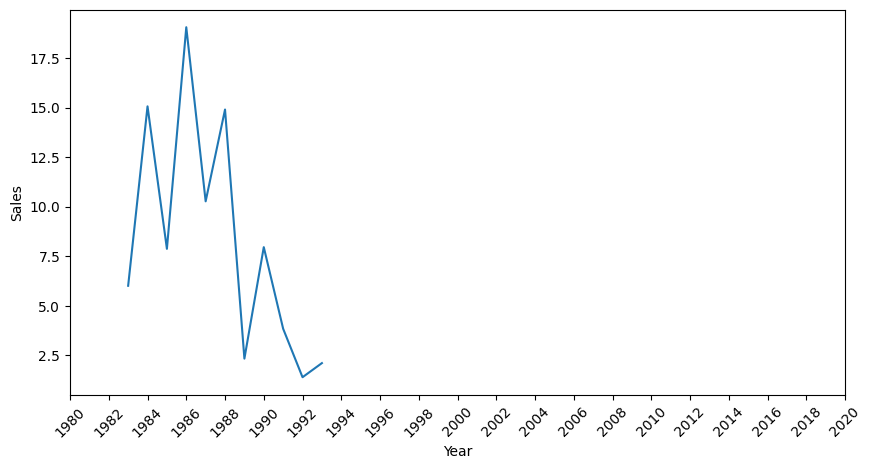

In [2028]:
#NES though the years 
NES_data=data_new[data_new['Platform']=='NES']

nes_by_year = NES_data.groupby('Year')['log_Global_Sales'].sum().sort_index().reset_index(name='Sales')

nes_by_year

plt.figure(figsize=(10,5))
sns.lineplot(data=nes_by_year, x='Year', y='Sales')
plt.xticks(np.arange(1980, 2021, 2), rotation=45)


In [2029]:
#wow, so even tho the platform did not last till 2020, it still sold many games, that its still the top selling platform 


### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


In [2030]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2031]:
'''#encoding for categorical variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

Platform_encoded = ohe.fit_transform(data_new[['Platform']])
feature_namesP = ohe.get_feature_names_out(['Platform'])
Platform_df = pd.DataFrame(Platform_encoded, columns=feature_namesP)
data_new = pd.concat([data_new, Platform_df], axis=1)


Genre_encoded = ohe.fit_transform(data_new[['Genre']])
feature_namesG = ohe.get_feature_names_out(['Genre'])
Genre_df = pd.DataFrame(Genre_encoded, columns=feature_namesG)
data_new = pd.concat([data_new, Genre_df], axis=1)



Publishers_encoded = ohe.fit_transform(data_new[['Publisher']])
feature_namesPUB = ohe.get_feature_names_out(['Publisher'])
Publisher_df = pd.DataFrame(Publishers_encoded, columns=feature_namesPUB)
data_new = pd.concat([data_new, Publisher_df], axis=1)




data_new.head()'''

"#encoding for categorical variables\n\nfrom sklearn.preprocessing import LabelEncoder, OneHotEncoder\n\nohe = OneHotEncoder(sparse_output=False, drop='first')\n\nPlatform_encoded = ohe.fit_transform(data_new[['Platform']])\nfeature_namesP = ohe.get_feature_names_out(['Platform'])\nPlatform_df = pd.DataFrame(Platform_encoded, columns=feature_namesP)\ndata_new = pd.concat([data_new, Platform_df], axis=1)\n\n\nGenre_encoded = ohe.fit_transform(data_new[['Genre']])\nfeature_namesG = ohe.get_feature_names_out(['Genre'])\nGenre_df = pd.DataFrame(Genre_encoded, columns=feature_namesG)\ndata_new = pd.concat([data_new, Genre_df], axis=1)\n\n\n\nPublishers_encoded = ohe.fit_transform(data_new[['Publisher']])\nfeature_namesPUB = ohe.get_feature_names_out(['Publisher'])\nPublisher_df = pd.DataFrame(Publishers_encoded, columns=feature_namesPUB)\ndata_new = pd.concat([data_new, Publisher_df], axis=1)\n\n\n\n\ndata_new.head()"

In [2032]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

#will scale the train and test data

## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


In [2033]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2034]:
data.shape

(16598, 11)

In [2035]:
#copy of only the data to be incloudedin the model: 
df = data[['Platform','Genre','Publisher']].copy()
X = pd.get_dummies(df, drop_first=True)
y=data['Global_Sales']


In [2036]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2037]:
model = LinearRegression()


In [2038]:
model.fit(X_train, y_train)


LinearRegression()

In [2039]:
y_preds1 = model.predict(X_test)
y_preds1

array([ 0.05300244,  0.96087069, -0.01086859, ..., -0.1036397 ,
        0.01878492,  0.65686399])

In [2040]:
#score_model1=metrics.r2_score(y_test, y_preds_lin1)
score_model1=metrics.r2_score(y_test, y_preds1)

print(score_model1)


-3.990350550519666e+21


In [2041]:
from sklearn.metrics import mean_squared_error

rmsqe_l1=np.sqrt(mean_squared_error(y_test, y_preds1))

In [2042]:
# now for the cleaned data:
df2 = data_new[['Platform','Genre','Publisher']].copy()
X2 = pd.get_dummies(df2, drop_first=True)
y2=data_new['log_Global_Sales']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()

model2.fit(X_train2, y_train2)

y_preds2 = model2.predict(X_test2)
y_preds2

array([0.3674999 , 0.75798248, 0.50367882, ..., 0.55311376, 0.56528592,
       0.26133187])

In [2043]:
score_model2=metrics.r2_score(y_test2, y_preds2)
score_model2

0.2333523921444467

In [2059]:
rmsqe_l2=np.sqrt(mean_squared_error(y_test2, y_preds2))

In [2060]:
print(score_model1)
print(score_model2)

-3.990350550519666e+21
0.2333523921444467


In [2045]:
#there is some improvement (40x ish), but this model (linear regression) may not be the best fit for this kind of data.

### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


In [2046]:
#starting with the raw data for the knn model : 
df3 = data[['Platform','Genre','Publisher']].copy()
X3 = pd.get_dummies(df3, drop_first=True)
y3=data['Global_Sales']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)




In [2047]:
#scaling the data for a better knn model:
X_train_scaled = sc.fit_transform(X_train3)
X_test_scaled = sc.transform(X_test3)

In [2048]:
#fitting the model:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train3)


KNeighborsRegressor()

In [2049]:
y_pred_knn = knn.predict(X_test_scaled)

In [2050]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\yaqee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2067]:
from sklearn.metrics import r2_score

r2_knn1 = r2_score(y_test3, y_pred_knn)

In [2072]:
print(r2_knn1)


0.013360330813326549


In [2071]:
sqmse_knn = np.sqrt(mean_squared_error(y_test3, y_pred_knn))


In [2073]:
sqmse_knn

2.0359843722031417

In [2080]:
#doing it with the new data: 

df4 = data_new[['Platform','Genre','Publisher']].copy()
X4 = pd.get_dummies(df2, drop_first=True)
y4=data_new['log_Global_Sales']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [2081]:
X_train_scaled2 = sc.fit_transform(X_train4)
X_test_scaled2 = sc.transform(X_test4)

In [2082]:
#fitting the model:
from sklearn.neighbors import KNeighborsRegressor

knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train_scaled2, y_train4)

KNeighborsRegressor()

In [2083]:
y_pred_knn2 = knn2.predict(X_test_scaled2)

In [2084]:
r2_knn2 = r2_score(y_test4, y_pred_knn2)

In [ ]:
print(r2_knn2)

0.21654552659981618


In [2086]:
sqmse_knn2 = np.sqrt(mean_squared_error(y_test4, y_pred_knn2))


### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


In [2087]:
# the results for the linear regression model :
print('Regression model:')
print("the results for the model with the base data:")
print(f'r2 score:  {score_model1}')
print(f'Root mean squared error:  {rmsqe_l1}\n')

print("the results for the improved model:")
print(f'r2 score:  {score_model2}')
print(f'Root mean squared error:  {rmsqe_l2}\n')

print("KNN model:")
print("the results for the model with the base data:")
print(f'r2 score:  {r2_knn1}')
print(f'Root mean squared error:  {sqmse_knn}\n')

print("the results for the improved model:")
print(f'r2 score:  {r2_knn2}')
print(f'Root mean squared error:  {sqmse_knn2}\n')


Regression model:
the results for the model with the base data:
r2 score:  -3.990350550519666e+21
Root mean squared error:  129479400123.54324

the results for the improved model:
r2 score:  0.2333523921444467
Root mean squared error:  0.36348689438299686

KNN model:
the results for the model with the base data:
r2 score:  0.013360330813326549
Root mean squared error:  2.0359843722031417

the results for the improved model:
r2 score:  0.21654552659981618
Root mean squared error:  0.3674495727568615



__For Classification:__
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC _**(Optional)**_
- Confusion Matrix

_Include visualizations and interpretation for each metric._


### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


In [ ]:
#both models got low but very similar r2 score and roor mean squared error for the improved model, 
#the raw data without improvment had much more errors in prediction and got a very low accuracy score (r2)

## Final Model & Insights
__Summarize your final model and key takeaways__

__Note__: _Use Bullet Points_
- Final model choice
- Business implications
- Limitations and future improvements


In [ ]:
# going with the linear regression might be better 
# even though both models had similer scores, but the linear regression model is easier to explain 
#but bettter and stronger models might be better for this data, XGBoost for example.

## References & Appendix
__Cite tools, libraries, and sources used__